In [4]:
from riverswim import MBIE, make_V_list, map_pi, riverswim
import numpy as np
import copy as cp
import pylab as pl
from tqdm.notebook import tqdm


nS = 5
gamma = 0.92
epsilon = 0.1
delta = 0.05

# Set the time horizon:
T = 3 * 10**4
nb_Replicates = 1

# Set the variables used for plotting.
cumerror_MB = [np.zeros(T), np.zeros(T)]

# Set the learning agents:
env = riverswim(nS)

print("Initialisation of V^*...")
V, V_star = make_V_list(env, gamma)


for s, support in enumerate([None, env.support]):
    MB = MBIE(nS, 2, gamma, epsilon, delta, support=support)
    initial_state = env.reset()
    MB.reset(initial_state)

    reward = 0
    state = initial_state

    for t in tqdm(range(1, T)):
        action, policy = MB.play(state, reward)
        V_pi = V[map_pi(policy)]
        cumerror_MB[s][t] = cumerror_MB[s][t-1] + (int(V_pi[state] < V_star[state] - epsilon))
        
        # Transition to new state and get reward
        state, reward = env.step(action)

time_steps = np.arange(T)

Initialisation of V^*...


  0%|          | 0/29999 [00:00<?, ?it/s]

  0%|          | 0/29999 [00:00<?, ?it/s]

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


<Figure size 640x480 with 0 Axes>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


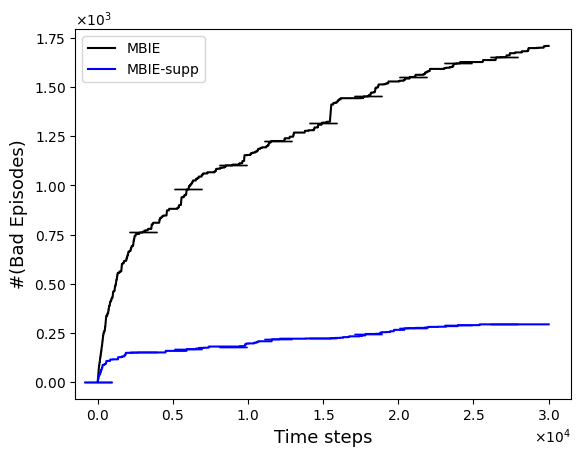

In [5]:
from riverswim import plot
plot([[cumerror_MB[0]], [cumerror_MB[1]]], ["MBIE", "MBIE-supp"])

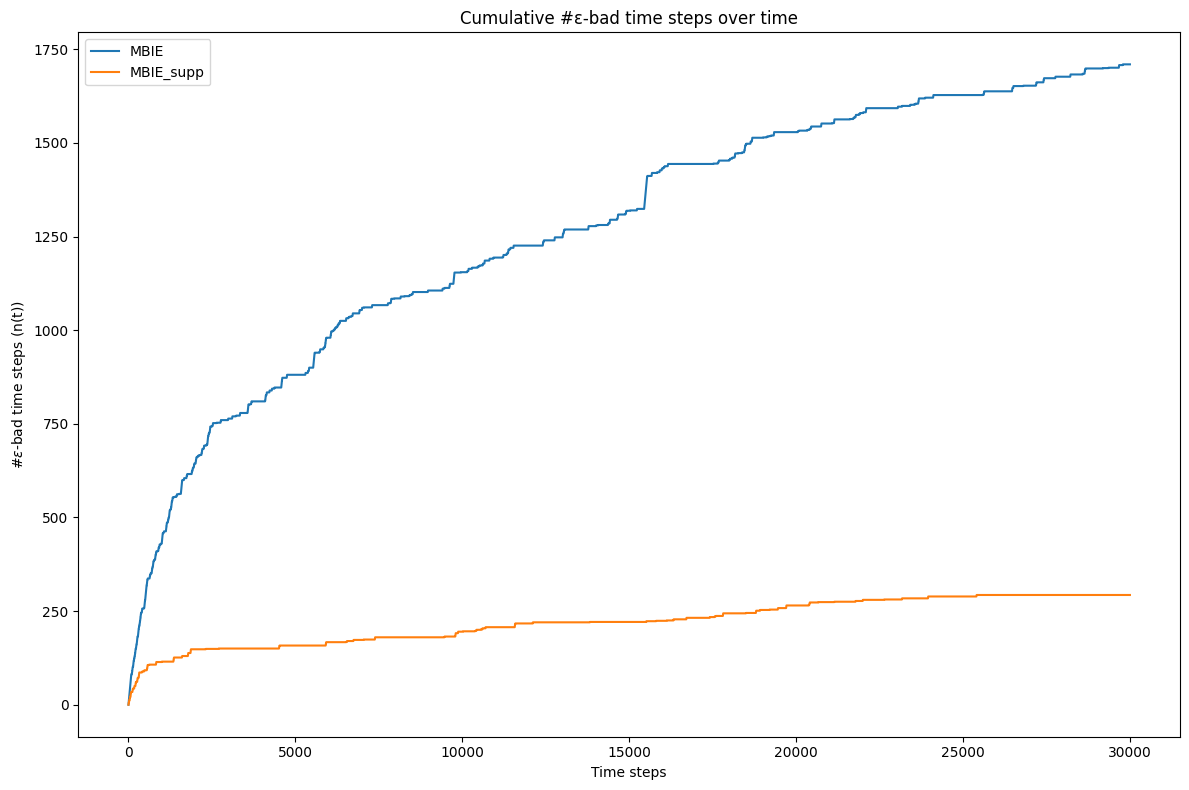

In [6]:
# Plotting for (i)
pl.figure(figsize=(12, 8))
# Plot mean with 95% confidence intervals
pl.plot(time_steps, cumerror_MB[0], label='MBIE')
pl.plot(time_steps, cumerror_MB[1], label='MBIE_supp')

# Labels and title
pl.xlabel('Time steps')
pl.ylabel(r'#$\epsilon$-bad time steps (n(t))')
pl.title('Cumulative #ε-bad time steps over time')
pl.tight_layout()
pl.legend()
#pl.savefig('artifacts/mbie_performance.pdf')
pl.show()
